In [19]:
import numpy as np
s = r"\xa5Z\x01\x00r-\x1d%\x90\xcdWA\x01\x00\x00\x00\xd0\xcdWA\x0c\x06\xaaU\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x01\x01"
a =  np.array(list(map(ord, s)))
a

array([ 92, 120,  97,  53,  90,  92, 120,  48,  49,  92, 120,  48,  48,
       114,  45,  92, 120,  49, 100,  37,  92, 120,  57,  48,  92, 120,
        99, 100,  87,  65,  92, 120,  48,  49,  92, 120,  48,  48,  92,
       120,  48,  48,  92, 120,  48,  48,  92, 120, 100,  48,  92, 120,
        99, 100,  87,  65,  92, 120,  48,  99,  92, 120,  48,  54,  92,
       120,  97,  97,  85,  92, 120,  48,  49,  92, 120,  48,  48,  92,
       120,  48,  48,  92, 120,  48,  48,  92, 120,  48,  49,  92, 120,
        48,  48,  92, 120,  48,  48,  92, 120,  48,  48,  92, 120,  48,
        48,  92, 120,  48,  48,  92, 120,  48,  49,  92, 120,  48,  49])

In [26]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.array([0,1,2,3,5,6,7,8, 9])
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, kind = "cubic")

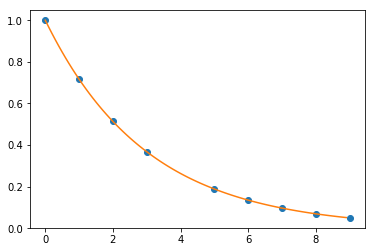

In [27]:
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make a random plot...
fig = plt.figure()
fig.add_subplot(111)
plt.plot(np.random.rand(100), np.random.rand(100), np.random.rand(100))

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
data.shape

In [ ]:
import pandas as pd
import numpy as np

dta = [ (1, {"a":1,"b":-50,"c":1, "d":True, "e":"PM"}),
        (2,{"a":2,"b":1,"c":"101","d":1,"e":1,"f":False,"g":True,"h":False,"I":"MLTPL"}),
        (3, {"a":3,"b":1,"c":"103","d":1,"e":1,"f":False,"g":True,"h":False,"I":"MLTPL"})]




# make a dataframe from the first row
df = pd.DataFrame(dta[0][1], index = [dta[0][0]])

# append a new row for each entry of the list
for row in np.arange(1, len(dta)):
    df = df.append(dta[row][1], ignore_index = True)

print(df)
    

In [ ]:
row = 1


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model.fit(x_train, y_train,
          batch_size=1024,
          epochs=12,
          verbose=1)

Epoch 1/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.1600 - acc: 0.9522
Epoch 2/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0966 - acc: 0.9707
Epoch 3/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0662 - acc: 0.9809
Epoch 4/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0487 - acc: 0.9853
Epoch 5/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0413 - acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0338 - acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0259 - acc: 0.9922
Epoch 8/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0219 - acc: 0.9931
Epoch 9/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0190 - acc: 0.9942
Epoch 10/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0477 - acc: 0.9891

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029706539517766212
Test accuracy: 0.9902
